# Example: Classification using Quantum Reservoir Computing

In this exampe, we demonstrate how to use Quantum Reservoir Computing (QRC) for a classification task.
We will use the ``QRCClassifier`` implementation to build a QRC model and train it on the moon data set of ``sklearn``.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from squlearn import Executor
from squlearn.qrc.qrc_classifier import QRCClassifier
from squlearn.encoding_circuit import ChebyshevPQC

## Generate the moon dataset

First, we generate the moon dataset using the ``make_moons`` function of ``sklearn``. We also rescale the data to be in the range $[-0.9, 0.9]$ to be compatible with the Chebyshev encoding circuit

In [2]:
# Generate the "moons" dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rescale the features to the range [-1, 1]
scaler = MinMaxScaler(feature_range=(-0.9, 0.9))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ``QRCClassifier`` Setup

We create the encoding circuit ``ChebyshevPQC`` for the Quantum Reservoir, parameters in the encoding circuit are randomly initialized.
Furthermore, we initialize the squlearn Executor for the circuit evaluations. 
Finally, we create a ``QRCClassifier`` instance with the encoding circuit and the executor, utilizing
200 random measurements as the input of a linear model.

In [3]:
# Encoding circuit
pqc = ChebyshevPQC(num_qubits=8, num_features=2, num_layers=2)
pqc.draw()

┌──────────┐┌─────────────────────┐                           »
q_0: ┤ Ry(p[0]) ├┤ Rx(p[8]*acos(x[0])) ├───────■───────────────────»
     ├──────────┤├─────────────────────┤ ┌─────┴─────┐             »
q_1: ┤ Ry(p[1]) ├┤ Rx(p[9]*acos(x[1])) ├─┤ Rz(p[16]) ├──────■──────»
     ├──────────┤├─────────────────────┴┐└───────────┘┌─────┴─────┐»
q_2: ┤ Ry(p[2]) ├┤ Rx(p[10]*acos(x[0])) ├──────■──────┤ Rz(p[20]) ├»
     ├──────────┤├──────────────────────┤┌─────┴─────┐└───────────┘»
q_3: ┤ Ry(p[3]) ├┤ Rx(p[11]*acos(x[1])) ├┤ Rz(p[17]) ├──────■──────»
     ├──────────┤├──────────────────────┤└───────────┘┌─────┴─────┐»
q_4: ┤ Ry(p[4]) ├┤ Rx(p[12]*acos(x[0])) ├──────■──────┤ Rz(p[21]) ├»
     ├──────────┤├──────────────────────┤┌─────┴─────┐└───────────┘»
q_5: ┤ Ry(p[5]) ├┤ Rx(p[13]*acos(x[1])) ├┤ Rz(p[18]) ├──────■──────»
     ├──────────┤├──────────────────────┤└───────────┘┌─────┴─────┐»
q_6: ┤ Ry(p[6]) ├┤ Rx(p[14]*acos(x[0])) ├──────■──────┤ Rz(p[22]) ├»
     ├──────────┤├──────────────────────┤┌─────┴─────┐└───────────┘»
q_7: ┤ Ry(p[7]) ├┤ Rx(p[15]*acos(x[1])) ├┤ Rz(p[19]) ├─────────────»
     └──────────┘└──────────────────────┘└───────────┘             »
«     ┌───────────┐┌──────────────────────┐                          »
«q_0: ┤ Rz(p[23]) ├┤ Rx(p[24]*acos(x[0])) ├──────■───────────────────»
«     └─────┬─────┘├──────────────────────┤┌─────┴─────┐             »
«q_1: ──────┼──────┤ Rx(p[25]*acos(x[1])) ├┤ Rz(p[32]) ├──────■──────»
«           │      ├──────────────────────┤└───────────┘┌─────┴─────┐»
«q_2: ──────┼──────┤ Rx(p[26]*acos(x[0])) ├──────■──────┤ Rz(p[36]) ├»
«           │      ├──────────────────────┤┌─────┴─────┐└───────────┘»
«q_3: ──────┼──────┤ Rx(p[27]*acos(x[1])) ├┤ Rz(p[33]) ├──────■──────»
«           │      ├──────────────────────┤└───────────┘┌─────┴─────┐»
«q_4: ──────┼──────┤ Rx(p[28]*acos(x[0])) ├──────■──────┤ Rz(p[37]) ├»
«           │      ├──────────────────────┤┌─────┴─────┐└───────────┘»
«q_5: ──────┼──────┤ Rx(p[29]*acos(x[1])) ├┤ Rz(p[34]) ├──────■──────»
«           │      ├──────────────────────┤└───────────┘┌─────┴─────┐»
«q_6: ──────┼──────┤ Rx(p[30]*acos(x[0])) ├──────■──────┤ Rz(p[38]) ├»
«           │      ├──────────────────────┤┌─────┴─────┐└───────────┘»
«q_7: ──────■──────┤ Rx(p[31]*acos(x[1])) ├┤ Rz(p[35]) ├─────────────»
«                  └──────────────────────┘└───────────┘             »
«     ┌───────────┐┌───────────┐
«q_0: ┤ Rz(p[39]) ├┤ Ry(p[40]) ├
«     └─────┬─────┘├───────────┤
«q_1: ──────┼──────┤ Ry(p[41]) ├
«           │      ├───────────┤
«q_2: ──────┼──────┤ Ry(p[42]) ├
«           │      ├───────────┤
«q_3: ──────┼──────┤ Ry(p[43]) ├
«           │      ├───────────┤
«q_4: ──────┼──────┤ Ry(p[44]) ├
«           │      ├───────────┤
«q_5: ──────┼──────┤ Ry(p[45]) ├
«           │      ├───────────┤
«q_6: ──────┼──────┤ Ry(p[46]) ├
«           │      ├───────────┤
«q_7: ──────■──────┤ Ry(p[47]) ├
«                  └───────────┘

In [4]:
# Executor
exec = Executor()

# Quantum Reservoir Computing model for regression
qrc = QRCClassifier(pqc, executor=exec, ml_model="linear", num_operators=200)

## Training

Next, we train the QRC model on the dataset using the ``fit`` method.

In [5]:
qrc.fit(X_train, y_train)

## Evaluate the model

We calculate the inference of the model on the training dataset.

In [6]:
y_pred = qrc.predict(X_test)

Plotting the final results.

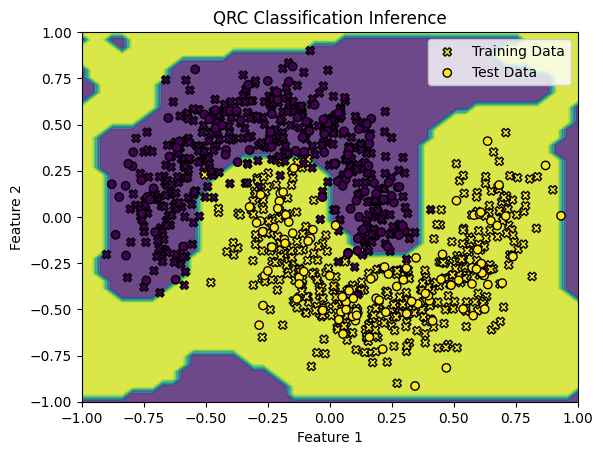

In [7]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
Z = qrc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", marker="X", label="Training Data"
)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k", marker="o", label="Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("QRC Classification Inference")
plt.legend()
plt.show()